In [3]:
import pandas as pd
import re
import io # input/output

In [20]:
text = """Awareness of luxury brands worldwide 2022	
Most recognized luxury brands worldwide in 2022, as an index score	
	
Gucci (Kering)	97
Chanel (Chanel Limited)	97
Louis Vuitton (LVMH)	96
Prada (Prada)	95
Dior (LVMH)	94
Hermès (Hermès International)	92
Ralph Lauren (Ralph Lauren)	91
Saint Laurent (Kering)	87
Balenciaga (Kering)	87
Burberry (Burberry)	86
Fendi (LVMH)	86
Givenchy (LVMH)	86
Versace (Capri Holdings)	85
Dolce & Gabbana	84
Bottega Veneta	82
Giorgio Armani (Giorgio Armani)	81
Hugo Boss (Hugo Boss)	80
Michael Kors (Capri Holdings)	79
Celine (LVMH)	76
Chloé	75
Tom Ford	75
"""

In [8]:
df = pd.read_csv(text, skiprows=3) # text represent filename not content

FileNotFoundError: [Errno 2] No such file or directory: 'Awareness of luxury brands worldwide 2022 \nMost recognized luxury brands worldwide in 2022, as an index score  \n    \nGucci (Kering)  97\nChanel (Chanel Limited) 97\nLouis Vuitton (LVMH)    96\nPrada (Prada)   95\nDior (LVMH) 94\nHermès (Hermès International)   92\nRalph Lauren (Ralph Lauren) 91\nSaint Laurent (Kering)  87\nBalenciaga (Kering) 87\nBurberry (Burberry) 86\nFendi (LVMH)    86\nGivenchy (LVMH) 86\nVersace (Capri Holdings)    85\nDolce & Gabbana 84\nBottega Veneta  82\nGiorgio Armani (Giorgio Armani) 81\nHugo Boss (Hugo Boss)   80\nMichael Kors (Capri Holdings)   79\nCeline (LVMH)   76\nChloé   75\nTom Ford    75\n'

In [21]:
df = pd.read_csv(io.StringIO(text), skiprows=3, sep='\t', names=['brand_owner', 'awareness'])
df

,brand_owner,awareness
0,Gucci (Kering),97
1,Chanel (Chanel Limited),97
2,Louis Vuitton (LVMH),96
3,Prada (Prada),95
4,Dior (LVMH),94
5,Hermès (Hermès International),92
6,Ralph Lauren (Ralph Lauren),91
7,Saint Laurent (Kering),87
8,Balenciaga (Kering),87
9,Burberry (Burberry),86


In [30]:
dt = df['brand_owner'].str.split('(', expand=True)
dt

,0,1
0,Gucci,Kering)
1,Chanel,Chanel Limited)
2,Louis Vuitton,LVMH)
3,Prada,Prada)
4,Dior,LVMH)
5,Hermès,Hermès International)
6,Ralph Lauren,Ralph Lauren)
7,Saint Laurent,Kering)
8,Balenciaga,Kering)
9,Burberry,Burberry)


In [32]:
dt.columns = ['brand', 'owner']
dt

,brand,owner
0,Gucci,Kering)
1,Chanel,Chanel Limited)
2,Louis Vuitton,LVMH)
3,Prada,Prada)
4,Dior,LVMH)
5,Hermès,Hermès International)
6,Ralph Lauren,Ralph Lauren)
7,Saint Laurent,Kering)
8,Balenciaga,Kering)
9,Burberry,Burberry)


In [37]:
df = pd.concat([dt, df['awareness']], axis=1)
df

,brand,owner,awareness
0,Gucci,Kering),97
1,Chanel,Chanel Limited),97
2,Louis Vuitton,LVMH),96
3,Prada,Prada),95
4,Dior,LVMH),94
5,Hermès,Hermès International),92
6,Ralph Lauren,Ralph Lauren),91
7,Saint Laurent,Kering),87
8,Balenciaga,Kering),87
9,Burberry,Burberry),86


In [41]:
df['brand'] = df['brand'].str.strip()
df

,brand,owner,awareness
0,Gucci,Kering),97
1,Chanel,Chanel Limited),97
2,Louis Vuitton,LVMH),96
3,Prada,Prada),95
4,Dior,LVMH),94
5,Hermès,Hermès International),92
6,Ralph Lauren,Ralph Lauren),91
7,Saint Laurent,Kering),87
8,Balenciaga,Kering),87
9,Burberry,Burberry),86


In [43]:
# slicing
df['owner'].str[:-1].to_list()

['Kering',
 'Chanel Limited',
 'LVMH',
 'Prada',
 'LVMH',
 'Hermès International',
 'Ralph Lauren',
 'Kering',
 'Kering',
 'Burberry',
 'LVMH',
 'LVMH',
 'Capri Holdings',
 None,
 None,
 'Giorgio Armani',
 'Hugo Boss',
 'Capri Holdings',
 'LVMH',
 None,
 None]

In [44]:
df['owner'] = df['owner'].str[:-1]
df

,brand,owner,awareness
0,Gucci,Kering,97
1,Chanel,Chanel Limited,97
2,Louis Vuitton,LVMH,96
3,Prada,Prada,95
4,Dior,LVMH,94
5,Hermès,Hermès International,92
6,Ralph Lauren,Ralph Lauren,91
7,Saint Laurent,Kering,87
8,Balenciaga,Kering,87
9,Burberry,Burberry,86


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   brand      21 non-null     object
 1   owner      17 non-null     object
 2   awareness  21 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 636.0+ bytes


In [53]:
df['owner'] = df['owner'].fillna(df['brand'])
df

,brand,owner,awareness
0,Gucci,Kering,97
1,Chanel,Chanel Limited,97
2,Louis Vuitton,LVMH,96
3,Prada,Prada,95
4,Dior,LVMH,94
5,Hermès,Hermès International,92
6,Ralph Lauren,Ralph Lauren,91
7,Saint Laurent,Kering,87
8,Balenciaga,Kering,87
9,Burberry,Burberry,86


In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Awareness of luxury brands worldwide 2022')

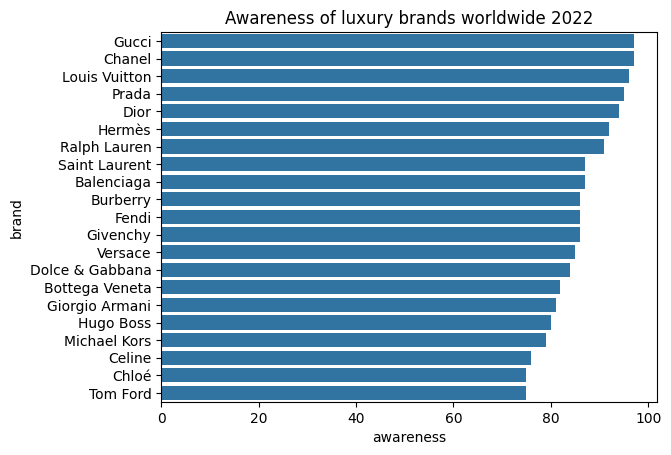

In [64]:
sns.barplot(data=df, x='awareness', y='brand');
plt.title(text.split('\n')[0][:-1])

# Top 15 Automakers in the World

In [162]:
url = r'https://github.com/prasertcbs/454_2566/raw/main/data/Top%2015%20Automakers%20in%20the%20World.csv'
df = pd.read_csv(url)

In [163]:
df['Status'] = df['Status'].str.replace('%', '').str.replace('↑ ', '').str.replace('↓ ', '-').astype(float)/100
df

,Automaker,Year,Sold Autos,Status,World Rank
0,Toyota,2022,9566961,0.01,1
1,Toyota,2021,9562483,0.01,1
2,Toyota,2020,9528753,-0.11,1
3,VW,2022,8263104,-0.07,2
4,VW,2021,8882346,-0.05,2
5,VW,2020,9305427,-0.15,2
6,Hyundai Kia,2022,6848198,0.03,3
7,Hyundai Kia,2021,6668037,0.05,3
8,Hyundai Kia,2020,6353514,-0.12,4
9,Stellantis,2022,6002900,-0.02,4


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Automaker   45 non-null     object 
 1   Year        45 non-null     int64  
 2   Sold Autos  45 non-null     int64  
 3   Status      45 non-null     float64
 4   World Rank  45 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.9+ KB


In [165]:
df['Year'].astype(str)

0     2022
1     2021
2     2020
3     2022
4     2021
5     2020
6     2022
7     2021
8     2020
9     2022
10    2021
11    2020
12    2022
13    2021
14    2020
15    2022
16    2021
17    2020
18    2022
19    2021
20    2020
21    2022
22    2021
23    2020
24    2022
25    2021
26    2020
27    2022
28    2021
29    2020
30    2022
31    2021
32    2020
33    2022
34    2021
35    2020
36    2022
37    2021
38    2020
39    2022
40    2021
41    2020
42    2022
43    2021
44    2020
Name: Year, dtype: object

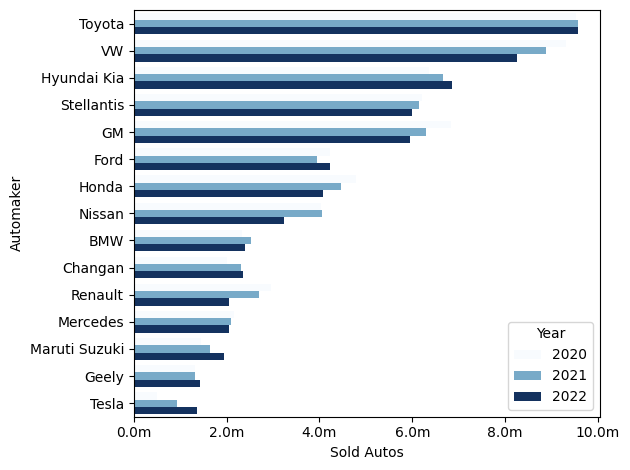

In [166]:
# format ticker
# sometimes if year isn't str, errors occur
import matplotlib.ticker as ticker
# g=sns.barplot(data=df, x='Sold Autos', y='Automaker', hue='Year', palette='Blues_r');
g=sns.barplot(data=df, x='Sold Autos', y='Automaker', hue='Year', palette='Blues');
g.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x/1e6:,.1f}m")) 
plt.tight_layout() # if not include this line, the picture will be cut out
# plt.savefig('a2.png')
plt.savefig('a2.svg')


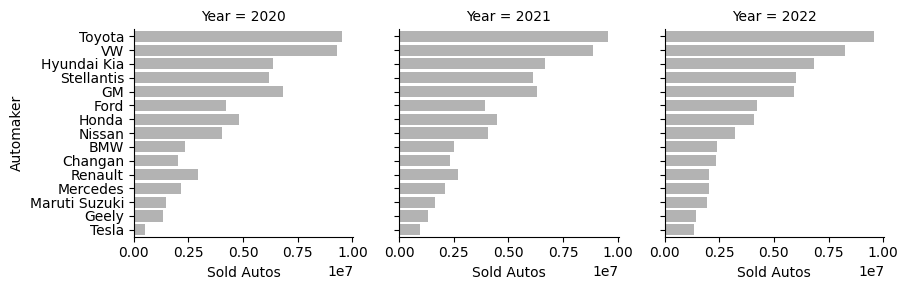

In [167]:
# catplot -> categorical plot (category, numerical)
# relplot -> relationship plot (continuous x, y)
g = sns.catplot(
    df,
    kind='bar',
    y='Automaker',
    x='Sold Autos',
    col='Year',
    color='.7',
    col_wrap=3,
    height=3,
    aspect=1,
    sharex=True
)

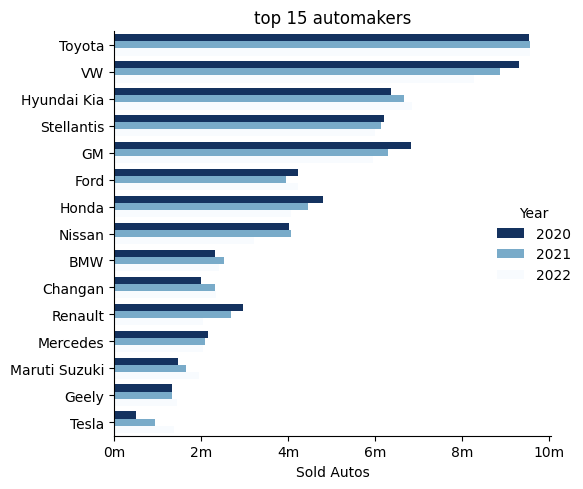

In [177]:
g = sns.catplot(
    # data=df[df['Year']=='2022'],
    data=df,
    kind="bar",
    y="Automaker",
    x="Sold Autos",
    hue='Year',
    # color=".7",
    palette='Blues_r',
    height=5,
    # aspect=1.6,
    sharex=True,
    errorbar=None
)
ax=g.axes[0][0]
ax.set_ylabel('')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x/1e6:.0f}m"))
ax.set_title('top 15 automakers')
plt.tight_layout()
plt.savefig('temp_chart.svg')

TypeError: 'Axes' object is not subscriptable

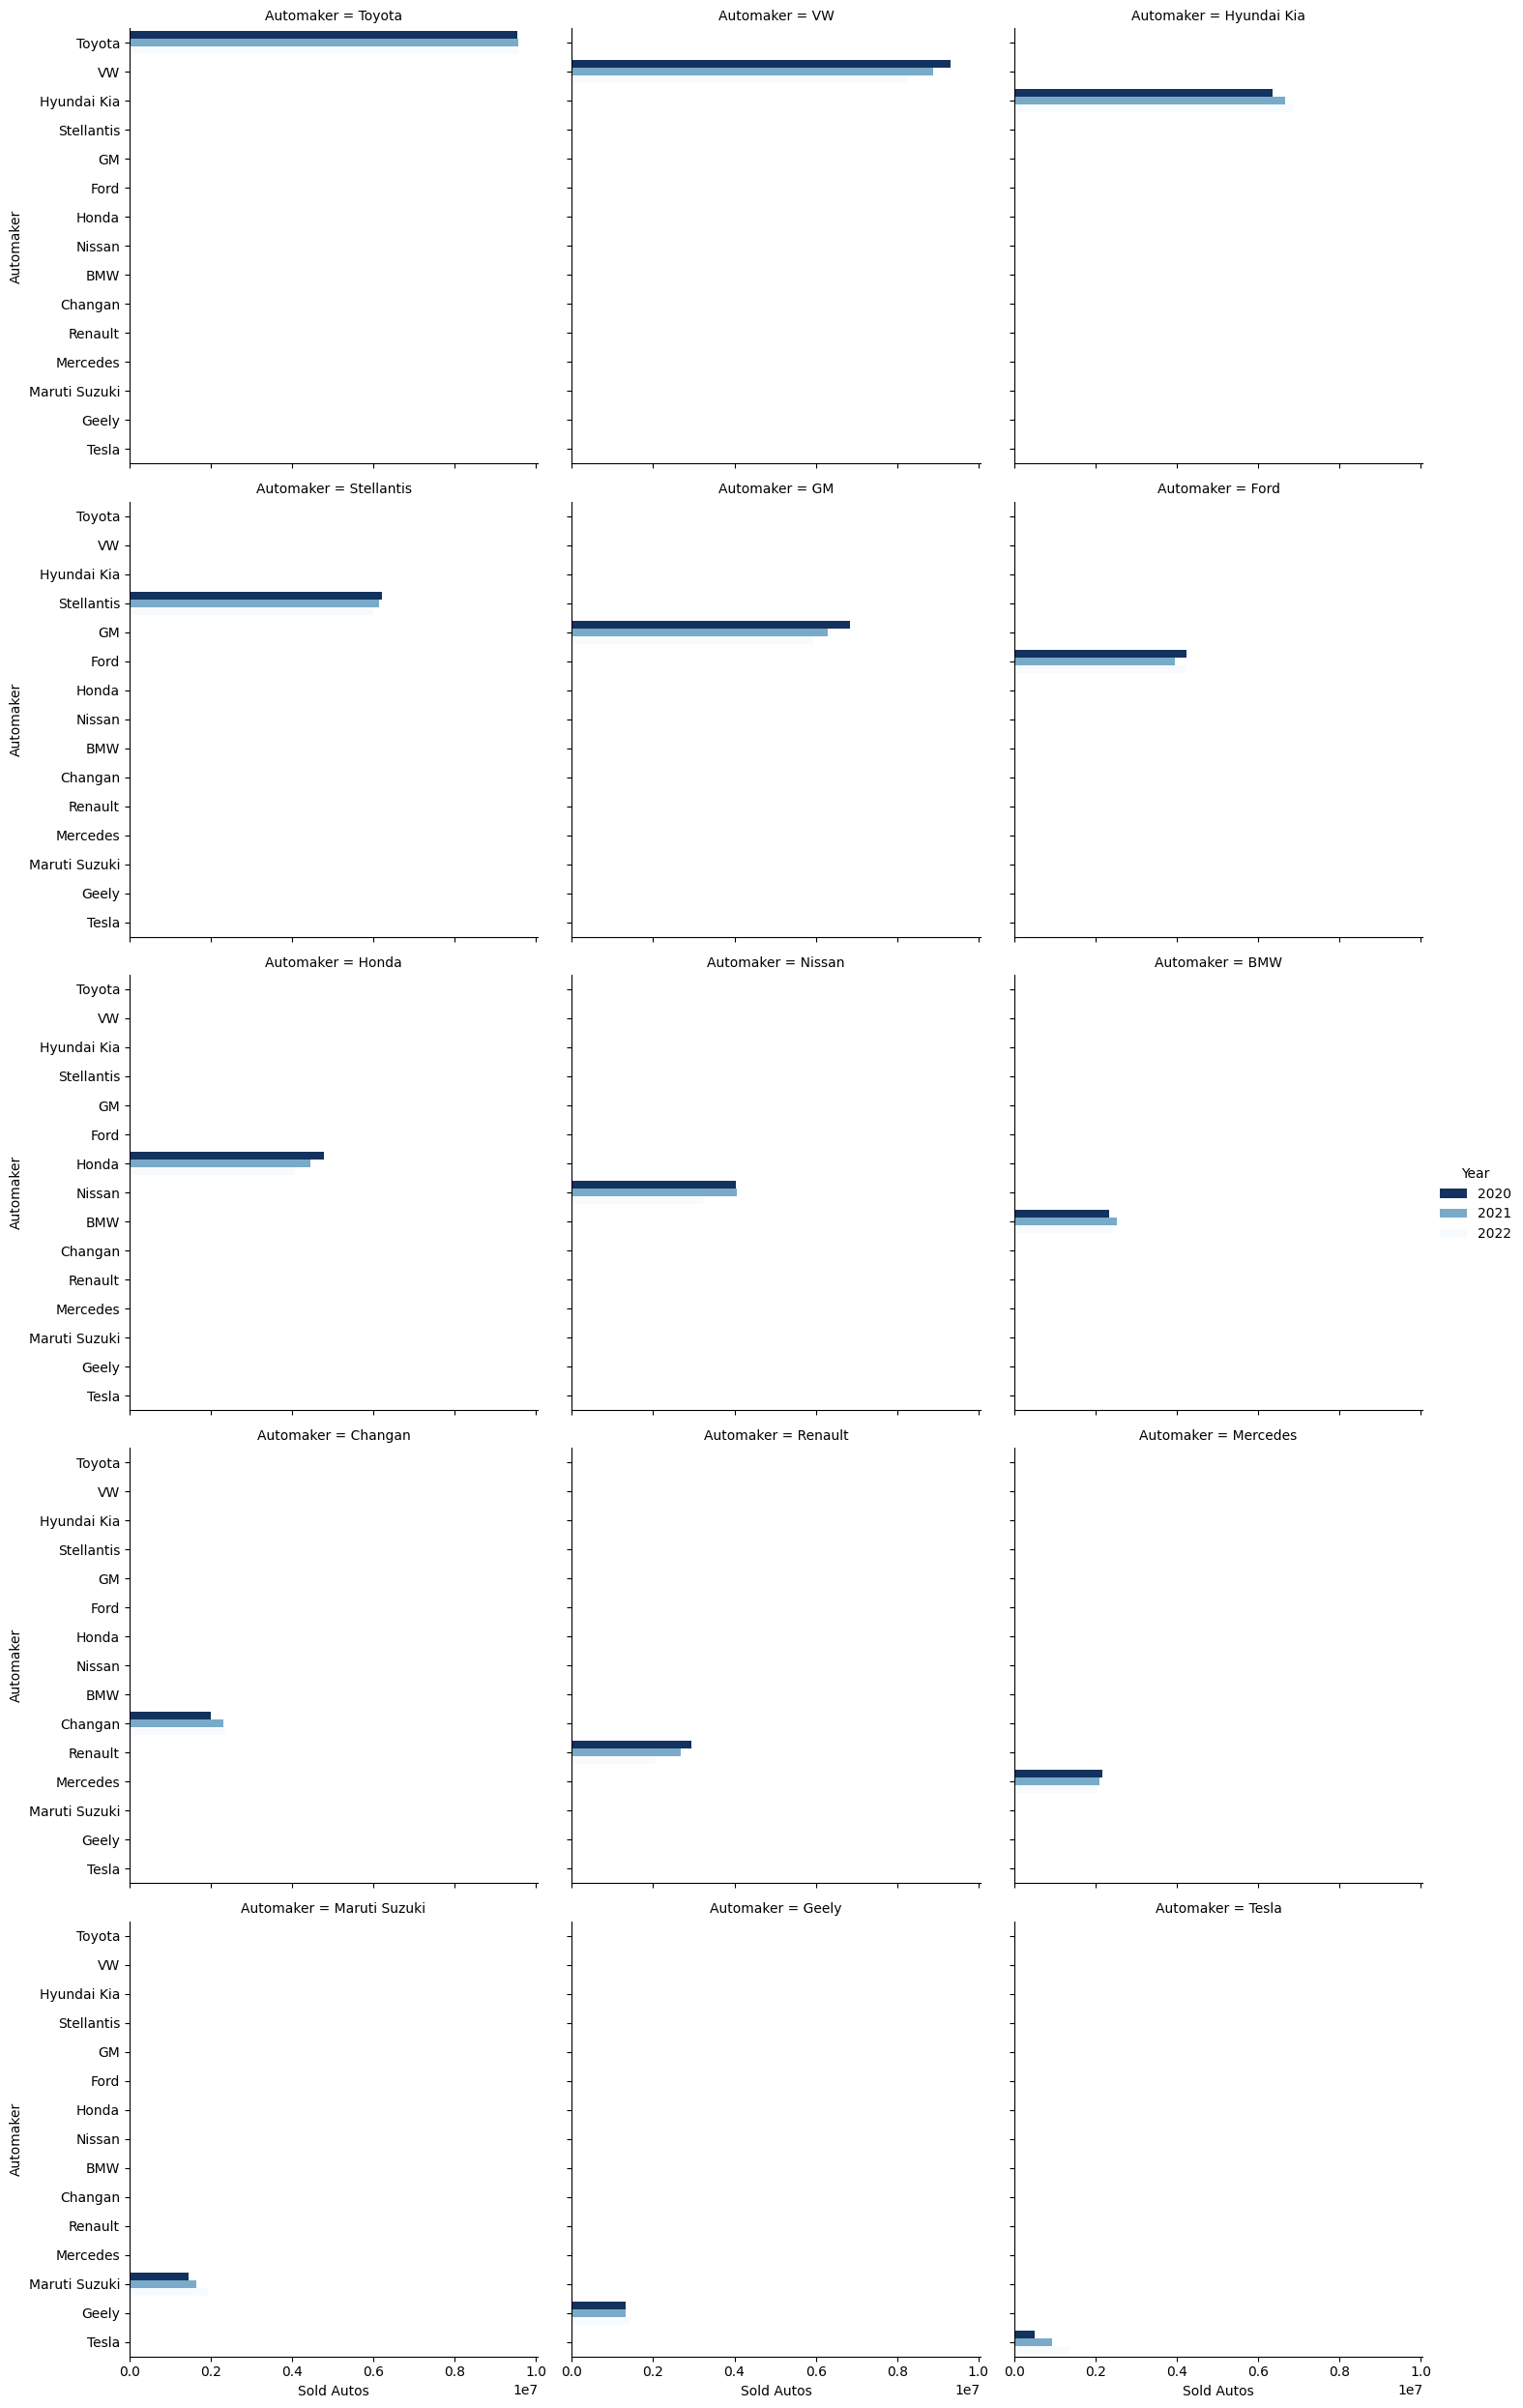

In [179]:
g = sns.catplot(
    # data=df[df['Year']=='2022'],
    data=df,
    kind="bar",
    y="Automaker",
    x="Sold Autos",
    hue='Year',
    col='Automaker',
    col_wrap=3,
    # color=".7",
    palette='Blues_r',
    height=5,
    # aspect=1.6,
    sharex=True,
    errorbar=None
)
ax=g.axes[0][0]
ax.set_ylabel('')
# ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x/1e6:.0f}m"))
ax.set_title('top 15 automakers')
# plt.tight_layout()
# plt.savefig('temp_chart.svg')

In [190]:
from code import interact
from ipywidgets import widgets, interact


palette_list = [
    "#cccc00", # RGB 
    "Blues_r",
    "Blues",
    "Oranges_r",
    "Oranges",
    "Set1",
    "Set2",
    "Set3",
    "Pastel1",
    "Pastel2",
    "Blues",
    "Greens",
    "Oranges",
    "deep",
    "muted",
    "pastel",
    "bright",
    "dark",
    "colorblind",
]

savefig_checkbox = widgets.Checkbox(
    value=False,  # Set the initial value
    description='save chart1.png',  # Set the label next to the checkbox
    disabled=False  # Set to True to disable the checkbox
)

# @interact -> @decorator
@interact(palette=palette_list, is_savefig=savefig_checkbox)
def plot_chart(palette, is_savefig=False): # default -> False
    g = sns.catplot(
        df,
        kind="bar",
        y="Automaker",
        x="Sold Autos",
        col="Year",
        color=".7",
        col_wrap=3,
        height=3.5,
        aspect=1.6,
        sharex=True,
        palette=[palette] if palette[0]=='#' else palette
    )

    # Define a formatter function to convert tick labels to millions
    def millions_formatter(x, pos):
        return f"{x/1e6:.0f}M"


    # Get the axes object from the catplot
    for ax in g.axes:
        # Set the formatter to the y-axis ticks
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))
        ax.set_ylabel("")
        ax.set_title(re.sub(".* = ", "", ax.get_title()))

    if is_savefig:
        g.savefig('chart1.png')

interactive(children=(Dropdown(description='palette', options=('#cccc00', 'Blues_r', 'Blues', 'Oranges_r', 'Or…

In [191]:
palette_list = [
    "#cccccc",
    "Blues_r",
    "Blues",
    "Greens_r",
    "Greens",
    "Oranges_r",
    "Oranges",
    "Set1",
    "Set2",
    "Set3",
    "Pastel1",
    "Pastel2",
    "deep",
    "muted",
    "pastel",
    "bright",
    "dark",
    "colorblind",
]

sales_range = widgets.IntRangeSlider(
    value=[0, df["Sold Autos"].max()],
    min=0,
    max=df["Sold Autos"].max(),
    step=1e6,
    description="Sold:",
    disabled=False,
    continuous_update=False,
    orientation="horizontal",
    readout=True,
    readout_format="d",
)


@interact(sales=sales_range, palette=palette_list)
def plot_chart(sales, palette=palette_list):
    g = sns.catplot(
        df[(df["Sold Autos"] >= sales[0]) & (df["Sold Autos"] <= sales[1])],
        kind="bar",
        y="Automaker",
        x="Sold Autos",
        col="Year",
        color=".7",
        col_wrap=3,
        height=3.5,
        aspect=1.6,
        sharex=True,
        palette=[palette] if palette[0] == "#" else palette,
    )
    # Get the axes object from the catplot
    axes = g.axes
    # g

    # Define a formatter function to convert tick labels to millions
    def millions_formatter(x, pos):
        return f"{x/1e6:.0f}M"

    # Set the formatter to the y-axis ticks
    for ax in axes:
        # ax.xaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x/1e6:.0f}M"))

interactive(children=(IntRangeSlider(value=(0, 9566961), continuous_update=False, description='Sold:', max=956…

# Try using RegEx

In [169]:
temp = pd.read_csv(io.StringIO(text), skiprows=3, sep='\t', names=['brand_owner', 'awareness'])
temp

,brand_owner,awareness
0,Gucci (Kering),97
1,Chanel (Chanel Limited),97
2,Louis Vuitton (LVMH),96
3,Prada (Prada),95
4,Dior (LVMH),94
5,Hermès (Hermès International),92
6,Ralph Lauren (Ralph Lauren),91
7,Saint Laurent (Kering),87
8,Balenciaga (Kering),87
9,Burberry (Burberry),86


In [170]:
temp2 = pd.concat([temp, temp['brand_owner'].str.extract(r'(.+)\s\((.+)\)')], axis=1)
temp2

,brand_owner,awareness,0,1
0,Gucci (Kering),97,Gucci,Kering
1,Chanel (Chanel Limited),97,Chanel,Chanel Limited
2,Louis Vuitton (LVMH),96,Louis Vuitton,LVMH
3,Prada (Prada),95,Prada,Prada
4,Dior (LVMH),94,Dior,LVMH
5,Hermès (Hermès International),92,Hermès,Hermès International
6,Ralph Lauren (Ralph Lauren),91,Ralph Lauren,Ralph Lauren
7,Saint Laurent (Kering),87,Saint Laurent,Kering
8,Balenciaga (Kering),87,Balenciaga,Kering
9,Burberry (Burberry),86,Burberry,Burberry


In [171]:
temp2[0] = temp2[0].fillna(temp2['brand_owner'])
temp2[1] = temp2[1].fillna(temp2['brand_owner'])
temp2

,brand_owner,awareness,0,1
0,Gucci (Kering),97,Gucci,Kering
1,Chanel (Chanel Limited),97,Chanel,Chanel Limited
2,Louis Vuitton (LVMH),96,Louis Vuitton,LVMH
3,Prada (Prada),95,Prada,Prada
4,Dior (LVMH),94,Dior,LVMH
5,Hermès (Hermès International),92,Hermès,Hermès International
6,Ralph Lauren (Ralph Lauren),91,Ralph Lauren,Ralph Lauren
7,Saint Laurent (Kering),87,Saint Laurent,Kering
8,Balenciaga (Kering),87,Balenciaga,Kering
9,Burberry (Burberry),86,Burberry,Burberry
